# **Algorithm "Decision Tree" for Classification Problems cp1, cp2, cp3**


* AJAY VIKRAM SINGH: A0020986B  e0384189@u.nus.edu
* RAHUL JALAN: A0195299H  e0384930@u.nus.edu


## Classification problem cp1

In [268]:
# The target variable 'readmitted' has 3 values - 
# Value '0' for 'No Readmit'
# Value '1' for 'Readmit >30 days'
# Value '2' for 'Readmit < 30 days'

# The original cleaned data was imbalanced, hence upsampling and downsampling is done
# Test Train split is done prior to balancing exercise
# Three datasets are available post balancing -  cp1_test.csv,  cp1_train_upsampled.csv, cp1_train_downsampled.csv


In [269]:
# Import needed libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import PolynomialFeatures
import warnings
warnings.filterwarnings("ignore")
np.random.seed(42)

In [270]:
# Read the datasets
df_cp1_test = pd.read_csv('.\cp1\cp1_test.csv')
df_cp1_train_up = pd.read_csv('.\cp1\cp1_train_upsampled.csv')
df_cp1_train_dn = pd.read_csv('.\cp1\cp1_train_downsampled.csv')

In [271]:
# Check basic Shape of Dataframe

print("\n cp1_test Dataframe Rows = ", len(df_cp1_test.index))
print("\n cp1_test Dataframe Columns = ", len(df_cp1_test.columns))

print("\n cp1_train_upsampled Dataframe Rows = ", len(df_cp1_train_up.index))
print("\n cp1_train_upsampled Dataframe Columns = ", len(df_cp1_train_up.columns))

print("\n cp1_train_downsampled Dataframe Rows = ", len(df_cp1_train_dn.index))
print("\n cp1_train_downsampled Dataframe Columns = ", len(df_cp1_train_dn.columns))


 cp1_test Dataframe Rows =  24873

 cp1_test Dataframe Columns =  44

 cp1_train_upsampled Dataframe Rows =  119973

 cp1_train_upsampled Dataframe Columns =  44

 cp1_train_downsampled Dataframe Rows =  25227

 cp1_train_downsampled Dataframe Columns =  44


In [272]:
# Set pandas options to display appropriate number of columns
pd.set_option("display.max_columns", 50)

In [273]:
df_cp1_test.describe()

,Unnamed: 0,Unnamed: 0.1,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,gender_Female,gender_Male,age_[0-10),age_[10-20),age_[20-30),age_[30-40),age_[40-50),age_[50-60),age_[60-70),age_[70-80),age_[80-90),age_[90-100),race_AfricanAmerican,race_Asian,race_Caucasian,race_Hispanic,race_Other,max_glu_serum_>200,max_glu_serum_>300,max_glu_serum_None,max_glu_serum_Norm,A1Cresult_>7,A1Cresult_>8,A1Cresult_None,A1Cresult_Norm,change_Ch,change_No,diabetesMed_No,diabetesMed_Yes,insulin_Down,insulin_No,insulin_Steady,insulin_Up,readmitted
count,24873.000000,24873.000000,24873.000000,24873.000000,24873.000000,24873.000000,24873.000000,24873.000000,24873.000000,24873.000000,24873.000000,24873.000000,24873.000000,24873.000000,24873.000000,24873.000000,24873.000000,24873.000000,24873.000000,24873.000000,24873.000000,24873.000000,24873.000000,24873.000000,24873.000000,24873.000000,24873.000000,24873.000000,24873.000000,24873.000000,24873.000000,24873.000000,24873.000000,24873.000000,24873.000000,24873.000000,24873.000000,24873.000000,24873.000000,24873.000000,24873.000000,24873.000000,24873.000000,24873.000000
mean,49716.935271,50835.621477,4.378081,43.237888,1.345113,16.018011,0.390866,0.213846,0.643911,7.442206,0.534314,0.465686,0.001528,0.006272,0.017368,0.036184,0.095766,0.167571,0.223375,0.250955,0.173964,0.027017,0.191975,0.006513,0.765127,0.020665,0.015720,0.014313,0.013107,0.947212,0.025369,0.038877,0.080368,0.829534,0.051220,0.460258,0.539742,0.231416,0.768584,0.120894,0.468379,0.300728,0.109999,0.575242
std,28717.852926,29336.550072,2.977525,19.654191,1.708651,8.145464,1.416628,1.132142,1.280861,1.923567,0.498831,0.498831,0.039057,0.078948,0.130642,0.186751,0.294277,0.373493,0.416516,0.433571,0.379086,0.162137,0.393862,0.080442,0.423928,0.142263,0.124392,0.118779,0.113734,0.223615,0.157246,0.193307,0.271868,0.376049,0.220451,0.498428,0.498428,0.421746,0.421746,0.326011,0.499009,0.458584,0.312895,0.682850
min,2.000000,2.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,24969.000000,25367.000000,2.000000,32.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,49903.000000,51169.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,74676.000000,76202.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000
max,99491.000000,101765.000000,14.000000,126.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00

In [274]:
df_cp1_train_up.describe()

,Unnamed: 0,Unnamed: 0.1,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,gender_Female,gender_Male,age_[0-10),age_[10-20),age_[20-30),age_[30-40),age_[40-50),age_[50-60),age_[60-70),age_[70-80),age_[80-90),age_[90-100),race_AfricanAmerican,race_Asian,race_Caucasian,race_Hispanic,race_Other,max_glu_serum_>200,max_glu_serum_>300,max_glu_serum_None,max_glu_serum_Norm,A1Cresult_>7,A1Cresult_>8,A1Cresult_None,A1Cresult_Norm,change_Ch,change_No,diabetesMed_No,diabetesMed_Yes,insulin_Down,insulin_No,insulin_Steady,insulin_Up,readmitted
count,119973.000000,119973.000000,119973.000000,119973.000000,119973.000000,119973.000000,119973.000000,119973.000000,119973.000000,119973.000000,119973.000000,119973.000000,119973.000000,119973.000000,119973.000000,119973.000000,119973.000000,119973.000000,119973.000000,119973.000000,119973.000000,119973.000000,119973.000000,119973.000000,119973.000000,119973.000000,119973.000000,119973.000000,119973.000000,119973.000000,119973.000000,119973.000000,119973.000000,119973.000000,119973.000000,119973.000000,119973.000000,119973.000000,119973.000000,119973.000000,119973.000000,119973.000000,119973.000000,119973.0000
mean,49488.825469,50602.800839,4.513791,43.416419,1.318322,16.300434,0.397498,0.248072,0.819051,7.534937,0.541413,0.458587,0.001200,0.005826,0.016704,0.037550,0.092679,0.164387,0.220033,0.263068,0.171430,0.027123,0.193002,0.006110,0.767139,0.019479,0.014270,0.015228,0.013528,0.945113,0.026131,0.035858,0.077759,0.840281,0.046102,0.473165,0.526835,0.219249,0.780751,0.130854,0.453119,0.298309,0.117718,1.0000
std,28535.062299,29150.206788,3.012469,19.585504,1.686928,8.067477,1.259177,1.064881,1.509113,1.874383,0.498284,0.498284,0.034624,0.076108,0.128160,0.190106,0.289984,0.370628,0.414270,0.440301,0.376886,0.162442,0.394656,0.077926,0.422656,0.138203,0.118602,0.122461,0.115521,0.227761,0.159525,0.185937,0.267793,0.366347,0.209707,0.499281,0.499281,0.413740,0.413740,0.337243,0.497799,0.457518,0.322275,0.8165
min,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000
25%,24638.000000,25030.000000,2.000000,32.000000,0.000000,11.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0000
50%,49412.000000,50673.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.0000
75%,73888.000000,75378.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,2.0000
max,99490.000000,101764.000000,14.000000,132.000000,6.000000,79.000000,36.000000,64.000000,19.000000,16.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1

In [275]:
df_cp1_train_dn.describe()

,Unnamed: 0,Unnamed: 0.1,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,gender_Female,gender_Male,age_[0-10),age_[10-20),age_[20-30),age_[30-40),age_[40-50),age_[50-60),age_[60-70),age_[70-80),age_[80-90),age_[90-100),race_AfricanAmerican,race_Asian,race_Caucasian,race_Hispanic,race_Other,max_glu_serum_>200,max_glu_serum_>300,max_glu_serum_None,max_glu_serum_Norm,A1Cresult_>7,A1Cresult_>8,A1Cresult_None,A1Cresult_Norm,change_Ch,change_No,diabetesMed_No,diabetesMed_Yes,insulin_Down,insulin_No,insulin_Steady,insulin_Up,readmitted
count,25227.000000,25227.000000,25227.000000,25227.000000,25227.000000,25227.000000,25227.000000,25227.000000,25227.000000,25227.000000,25227.000000,25227.000000,25227.000000,25227.000000,25227.000000,25227.000000,25227.000000,25227.000000,25227.000000,25227.000000,25227.000000,25227.000000,25227.000000,25227.000000,25227.000000,25227.000000,25227.000000,25227.000000,25227.000000,25227.000000,25227.000000,25227.000000,25227.000000,25227.000000,25227.000000,25227.000000,25227.000000,25227.000000,25227.000000,25227.000000,25227.00000,25227.000000,25227.000000,25227.000000
mean,49402.584572,50515.166052,4.522575,43.450351,1.321560,16.387244,0.394974,0.248345,0.816348,7.534308,0.541682,0.458318,0.000991,0.005470,0.015975,0.037698,0.093273,0.165220,0.218853,0.265430,0.169897,0.027193,0.193523,0.006065,0.765767,0.019661,0.014984,0.015182,0.013953,0.943553,0.027312,0.033496,0.077417,0.842470,0.046617,0.472589,0.527411,0.216990,0.783010,0.132794,0.45158,0.296627,0.118999,1.000000
std,28611.412838,29228.043962,3.008563,19.491438,1.688375,8.154785,1.268399,1.056088,1.508560,1.868348,0.498269,0.498269,0.031465,0.073761,0.125381,0.190468,0.290821,0.371386,0.413477,0.441571,0.375550,0.162649,0.395067,0.077643,0.423527,0.138837,0.121491,0.122279,0.117299,0.230788,0.162994,0.179931,0.267257,0.364307,0.210821,0.499258,0.499258,0.412204,0.412204,0.339359,0.49766,0.456780,0.323794,0.816513
min,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,24430.500000,24819.500000,2.000000,32.000000,0.000000,11.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,49157.000000,50417.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000,1.000000
75%,73918.500000,75411.500000,6.000000,57.000000,2.000000,21.000000,0.000000,0.000000,1.000000,9.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.00000,1.000000,0.000000,2.000000
max,99487.000000,101761.000000,14.000000,132.000000,6.000000,75.000000,36.000000,64.000000,19.000000,16.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.

In [276]:
df_cp1_test.sample(5)

,Unnamed: 0,Unnamed: 0.1,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,gender_Female,gender_Male,age_[0-10),age_[10-20),age_[20-30),age_[30-40),age_[40-50),age_[50-60),age_[60-70),age_[70-80),age_[80-90),age_[90-100),race_AfricanAmerican,race_Asian,race_Caucasian,race_Hispanic,race_Other,max_glu_serum_>200,max_glu_serum_>300,max_glu_serum_None,max_glu_serum_Norm,A1Cresult_>7,A1Cresult_>8,A1Cresult_None,A1Cresult_Norm,change_Ch,change_No,diabetesMed_No,diabetesMed_Yes,insulin_Down,insulin_No,insulin_Steady,insulin_Up,readmitted
14615,51959,53233,1,55,0,12,0,0,1,5,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0
19969,98846,101095,2,48,0,9,0,0,0,9,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0
17103,71495,72897,2,37,0,12,2,0,0,6,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1,0,0,1
23338,64699,66035,3,20,0,5,0,0,0,9,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,0
11209,45791,47041,13,78,5,31,0,0,0,9,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0


In [277]:
df_cp1_train_up.sample(5)

,Unnamed: 0,Unnamed: 0.1,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,gender_Female,gender_Male,age_[0-10),age_[10-20),age_[20-30),age_[30-40),age_[40-50),age_[50-60),age_[60-70),age_[70-80),age_[80-90),age_[90-100),race_AfricanAmerican,race_Asian,race_Caucasian,race_Hispanic,race_Other,max_glu_serum_>200,max_glu_serum_>300,max_glu_serum_None,max_glu_serum_Norm,A1Cresult_>7,A1Cresult_>8,A1Cresult_None,A1Cresult_Norm,change_Ch,change_No,diabetesMed_No,diabetesMed_Yes,insulin_Down,insulin_No,insulin_Steady,insulin_Up,readmitted
28038,87503,89413,4,1,2,16,0,0,0,6,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,1,0,0,0
51589,14624,14883,8,58,3,12,0,0,0,9,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,0,1,0,0,1
72128,54444,55726,2,60,0,15,0,0,0,9,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,1
30109,93121,95202,1,46,0,11,1,1,4,8,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,1,0,0,1,0,0,0
79257,31750,32649,4,62,0,12,0,0,0,6,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,1,0,0,1,0,0,1


In [278]:
df_cp1_train_dn.sample(5)

,Unnamed: 0,Unnamed: 0.1,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,gender_Female,gender_Male,age_[0-10),age_[10-20),age_[20-30),age_[30-40),age_[40-50),age_[50-60),age_[60-70),age_[70-80),age_[80-90),age_[90-100),race_AfricanAmerican,race_Asian,race_Caucasian,race_Hispanic,race_Other,max_glu_serum_>200,max_glu_serum_>300,max_glu_serum_None,max_glu_serum_Norm,A1Cresult_>7,A1Cresult_>8,A1Cresult_None,A1Cresult_Norm,change_Ch,change_No,diabetesMed_No,diabetesMed_Yes,insulin_Down,insulin_No,insulin_Steady,insulin_Up,readmitted
15230,35437,36619,3,33,1,26,0,0,0,7,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,1,0,0,0,1
18847,82608,84385,4,41,0,15,0,0,1,9,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,2
6914,66911,68256,4,54,1,24,0,0,1,9,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,1,0,0,0
1543,28239,28816,4,62,0,10,0,0,0,5,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0
9823,73320,74789,7,53,0,30,0,0,4,8,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,1,1


In [279]:
# We drop first 2 columns from all 3 datasets since they have some unknown data, probably due to balancing exercise

df_cp1_test=df_cp1_test.drop(columns=list(df_cp1_test)[0:2])
df_cp1_train_up=df_cp1_train_up.drop(columns=list(df_cp1_train_up)[0:2])
df_cp1_train_dn=df_cp1_train_dn.drop(columns=list(df_cp1_train_dn)[0:2])
y_test=df_cp1_test.pop('readmitted')
y_train_up=df_cp1_train_up.pop('readmitted')
y_train_dn=df_cp1_train_dn.pop('readmitted')

In [280]:
def fit_predict(X_train, X_test, y_train, y_test, scaler, max_depth,
                 max_features=1, min_samples_split=4, criterion='entropy'):

    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    dt = DecisionTreeClassifier(criterion=criterion, max_depth=max_depth,
                                random_state=42, max_features=max_features,
                                min_samples_split=min_samples_split)
    dt.fit(X_train_scaled, y_train)
    y_pred = dt.predict(X_test_scaled)
    print('%8f'%(accuracy_score(y_test, y_pred)))
    

### Hyperparameter Tuning - Max depth

In [281]:
# For upscaled training dataset

for i in range(1, 50):
    print('Accuracy score using max_depth =', i, end = ':  ')
    fit_predict(df_cp1_train_up, df_cp1_test, y_train_up, y_test, StandardScaler(), i)

Accuracy score using max_depth = 1:  0.154264
Accuracy score using max_depth = 2:  0.368753
Accuracy score using max_depth = 3:  0.292365
Accuracy score using max_depth = 4:  0.309975
Accuracy score using max_depth = 5:  0.312869
Accuracy score using max_depth = 6:  0.278414
Accuracy score using max_depth = 7:  0.244402
Accuracy score using max_depth = 8:  0.331765
Accuracy score using max_depth = 9:  0.395650
Accuracy score using max_depth = 10:  0.321553
Accuracy score using max_depth = 11:  0.350782
Accuracy score using max_depth = 12:  0.374020
Accuracy score using max_depth = 13:  0.390986
Accuracy score using max_depth = 14:  0.373337
Accuracy score using max_depth = 15:  0.367145
Accuracy score using max_depth = 16:  0.384835
Accuracy score using max_depth = 17:  0.362160
Accuracy score using max_depth = 18:  0.389860
Accuracy score using max_depth = 19:  0.405058
Accuracy score using max_depth = 20:  0.414626
Accuracy score using max_depth = 21:  0.409440
Accuracy score using m

In [282]:
# For downscaled training dataset

for i in range(1, 50):
    print('Accuracy score using max_depth =', i, end = ':  ')
    fit_predict(df_cp1_train_dn, df_cp1_test, y_train_dn, y_test, StandardScaler(), i)

Accuracy score using max_depth = 1:  0.154264
Accuracy score using max_depth = 2:  0.368753
Accuracy score using max_depth = 3:  0.358501
Accuracy score using max_depth = 4:  0.384594
Accuracy score using max_depth = 5:  0.361798
Accuracy score using max_depth = 6:  0.316247
Accuracy score using max_depth = 7:  0.345073
Accuracy score using max_depth = 8:  0.468460
Accuracy score using max_depth = 9:  0.356451
Accuracy score using max_depth = 10:  0.356049
Accuracy score using max_depth = 11:  0.436497
Accuracy score using max_depth = 12:  0.397459
Accuracy score using max_depth = 13:  0.393519
Accuracy score using max_depth = 14:  0.389257
Accuracy score using max_depth = 15:  0.382222
Accuracy score using max_depth = 16:  0.400314
Accuracy score using max_depth = 17:  0.385559
Accuracy score using max_depth = 18:  0.412254
Accuracy score using max_depth = 19:  0.393439
Accuracy score using max_depth = 20:  0.396655
Accuracy score using max_depth = 21:  0.397459
Accuracy score using m

In [283]:
# Looking at results we can see the best score is achieved for 'Upscaled' dataset at 'depth' 39 = 0.466088
# Looking at results we can see the best score is achieved for 'Downscaled' dataset at 'depth' 8 = 0.468460

# Overall best score is with 'Downscaled' dataset at depth 8

# We pick depth = 39 for upscaled 
# We pick depth = 8 for downscaled 

### Hyperparameter Tuning - Max Features

In [284]:
# For upscaled training dataset

for i in np.arange(0.1, 1.0, 0.1):
    print('Accuracy score using max features =', i, end = ': ')
    fit_predict(df_cp1_train_up, df_cp1_test, y_train_up, y_test, StandardScaler(), max_depth = 39, max_features=i)

Accuracy score using max features = 0.1: 0.458449
Accuracy score using max features = 0.2: 0.463635
Accuracy score using max features = 0.30000000000000004: 0.464640
Accuracy score using max features = 0.4: 0.460137
Accuracy score using max features = 0.5: 0.461826
Accuracy score using max features = 0.6: 0.457846
Accuracy score using max features = 0.7000000000000001: 0.455554
Accuracy score using max features = 0.8: 0.462389
Accuracy score using max features = 0.9: 0.461504


In [285]:
# For downscaled training dataset

for i in np.arange(0.1, 1.0, 0.1):
    print('Accuracy score using max features =', i, end = ': ')
    fit_predict(df_cp1_train_dn, df_cp1_test, y_train_dn, y_test, StandardScaler(), max_depth = 8, max_features=i)

Accuracy score using max features = 0.1: 0.416918
Accuracy score using max features = 0.2: 0.482813
Accuracy score using max features = 0.30000000000000004: 0.473123
Accuracy score using max features = 0.4: 0.482250
Accuracy score using max features = 0.5: 0.455233
Accuracy score using max features = 0.6: 0.465364
Accuracy score using max features = 0.7000000000000001: 0.458931
Accuracy score using max features = 0.8: 0.459213
Accuracy score using max features = 0.9: 0.475335


In [286]:
# best score is achieved for 'Upscaled' dataset at 'max_features' 0.3 = 0.464640
# best score is achieved for 'Downscaled' dataset at 'max_features' 0.2 = 0.482813

# Overall best score is with 'Downscaled' dataset at max_features 0.2
# for 'upscaled' dataset we select max_features = 0.3
# for 'downscaled' dataset we select max_features = 0.2

### Hyperparameter Tuning - Min samples split

In [287]:
# For upscaled dataset

for i in range(2, 10):
    print('Accuracy score using min samples split =', i, end=': ')
    fit_predict(df_cp1_train_up,
                df_cp1_test,
                y_train_up,
                y_test,
                StandardScaler(),
                max_depth=39,
                max_features=0.3,
                min_samples_split=i)

Accuracy score using min samples split = 2: 0.460781
Accuracy score using min samples split = 3: 0.463434
Accuracy score using min samples split = 4: 0.464640
Accuracy score using min samples split = 5: 0.458208
Accuracy score using min samples split = 6: 0.454670
Accuracy score using min samples split = 7: 0.453825
Accuracy score using min samples split = 8: 0.455514
Accuracy score using min samples split = 9: 0.459333


In [288]:
# For downscaled dataset

for i in range(2, 10):
    print('Accuracy score using min samples split =', i, end=': ')
    fit_predict(df_cp1_train_dn,
                df_cp1_test,
                y_train_dn,
                y_test,
                StandardScaler(),
                max_depth=8,
                max_features=0.2,
                min_samples_split=i)

Accuracy score using min samples split = 2: 0.476621
Accuracy score using min samples split = 3: 0.467736
Accuracy score using min samples split = 4: 0.482813
Accuracy score using min samples split = 5: 0.482049
Accuracy score using min samples split = 6: 0.495718
Accuracy score using min samples split = 7: 0.485748
Accuracy score using min samples split = 8: 0.493507
Accuracy score using min samples split = 9: 0.484541


In [289]:
# best score is achieved for 'Upscaled' dataset at 'min_sample_split' 4 = 0.464640,  no improvement
# best score is achieved for 'Downscaled' dataset at 'min_sample_split' 6 = 0.495718,  improvement from previous

# Overall best score is with 'Downscaled' dataset at 'min_sample_split' 6 = 0.495718

# for 'upscaled' dataset we select min_sample_split = 4
# for 'downscaled' dataset we select min_sample_split = 6

### Hyperparameter Tuning - Criterion

In [290]:
# For upscaled dataset

for i in ['gini', 'entropy']:
    print('Accuracy score using criterion =', i, end = ': ')
    fit_predict(df_cp1_train_up,
                df_cp1_test,
                y_train_up,
                y_test,
                StandardScaler(),
                max_depth=39,
                max_features=0.3,
                min_samples_split=4,
               criterion=i)

Accuracy score using criterion = gini: 0.461545
Accuracy score using criterion = entropy: 0.464640


In [291]:
# Criterion 'entropy' is better, so we retain it, no improvement with 'gini'

In [292]:
# For downscaled dataset

for i in ['gini', 'entropy']:
    print('Accuracy score using criterion =', i, end = ': ')
    fit_predict(df_cp1_train_dn,
                df_cp1_test,
                y_train_dn,
                y_test,
                StandardScaler(),
                max_depth=8,
                max_features=0.2,
                min_samples_split=6,
               criterion=i)

Accuracy score using criterion = gini: 0.417762
Accuracy score using criterion = entropy: 0.495718


In [293]:
# Criterion 'entropy' is better for both upscaled and downscaled datasets, so we retain it, no improvement with 'gini'

### Final Decision Tree parameters for cp1

In [294]:
# For upscaled dataset

dt = DecisionTreeClassifier(criterion='entropy',max_depth=39,max_features=0.3,min_samples_split=4,random_state=42)
dt.fit(df_cp1_train_up, y_train_up)
print("Accuracy on training set: {:.6f}".format(dt.score(df_cp1_train_up, y_train_up)))
print("Accuracy on test set: {:.6f}".format(dt.score(df_cp1_test, y_test)))

Accuracy on training set: 0.968860
Accuracy on test set: 0.464399


In [295]:
# For downscaled dataset

dt = DecisionTreeClassifier(criterion='entropy',max_depth=8,max_features=0.2,min_samples_split=6,random_state=42)
dt.fit(df_cp1_train_dn, y_train_dn)
print("Accuracy on training set: {:.6f}".format(dt.score(df_cp1_train_dn, y_train_dn)))
print("Accuracy on test set: {:.6f}".format(dt.score(df_cp1_test, y_test)))

Accuracy on training set: 0.442066
Accuracy on test set: 0.495718


In [296]:
# Overall we select 'Downscaled training dataset' to train our model as it gives us ~8% better result on test dataset

In [297]:
y_pred = dt.predict(df_cp1_test)

In [298]:
from sklearn.metrics import classification_report, confusion_matrix  

print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred)) 

[[9173 2530 1622]
 [4380 2328 2080]
 [1261  670  829]]
              precision    recall  f1-score   support

           0       0.62      0.69      0.65     13325
           1       0.42      0.26      0.33      8788
           2       0.18      0.30      0.23      2760

    accuracy                           0.50     24873
   macro avg       0.41      0.42      0.40     24873
weighted avg       0.50      0.50      0.49     24873



## Classification problem cp2

In [299]:
# The target variable 'readmit_noreadmit' has 2 values - 
# Value '0' for 'No Readmit'
# Value '1' for 'Readmit < 30 days' or 'Readmit >30 days'



In [300]:
# Read the datasets
df_cp2_test = pd.read_csv('.\cp2\cp2_test.csv')
df_cp2_train = pd.read_csv('.\cp2\cp2_train.csv')


In [301]:
# Check basic Shape of Dataframe

print("\n cp2_test Dataframe Rows = ", len(df_cp2_test.index))
print("\n cp2_test Dataframe Columns = ", len(df_cp2_test.columns))

print("\n cp2_train Dataframe Rows = ", len(df_cp2_train.index))
print("\n cp2_train Dataframe Columns = ", len(df_cp2_train.columns))


 cp2_test Dataframe Rows =  24873

 cp2_test Dataframe Columns =  44

 cp2_train Dataframe Rows =  74619

 cp2_train Dataframe Columns =  44


In [302]:
df_cp2_test.describe()

,Unnamed: 0,Unnamed: 0.1,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,gender_Female,gender_Male,age_[0-10),age_[10-20),age_[20-30),age_[30-40),age_[40-50),age_[50-60),age_[60-70),age_[70-80),age_[80-90),age_[90-100),race_AfricanAmerican,race_Asian,race_Caucasian,race_Hispanic,race_Other,max_glu_serum_>200,max_glu_serum_>300,max_glu_serum_None,max_glu_serum_Norm,A1Cresult_>7,A1Cresult_>8,A1Cresult_None,A1Cresult_Norm,change_Ch,change_No,diabetesMed_No,diabetesMed_Yes,insulin_Down,insulin_No,insulin_Steady,insulin_Up,readmit_noreadmit
count,24873.000000,24873.000000,24873.000000,24873.000000,24873.000000,24873.000000,24873.000000,24873.000000,24873.000000,24873.000000,24873.000000,24873.000000,24873.000000,24873.000000,24873.000000,24873.000000,24873.000000,24873.000000,24873.000000,24873.000000,24873.000000,24873.000000,24873.000000,24873.000000,24873.000000,24873.000000,24873.000000,24873.000000,24873.000000,24873.000000,24873.000000,24873.000000,24873.000000,24873.000000,24873.000000,24873.000000,24873.000000,24873.000000,24873.000000,24873.000000,24873.000000,24873.000000,24873.000000,24873.000000
mean,49716.935271,50835.621477,4.378081,43.237888,1.345113,16.018011,0.390866,0.213846,0.643911,7.442206,0.534314,0.465686,0.001528,0.006272,0.017368,0.036184,0.095766,0.167571,0.223375,0.250955,0.173964,0.027017,0.191975,0.006513,0.765127,0.020665,0.015720,0.014313,0.013107,0.947212,0.025369,0.038877,0.080368,0.829534,0.051220,0.460258,0.539742,0.231416,0.768584,0.120894,0.468379,0.300728,0.109999,0.464279
std,28717.852926,29336.550072,2.977525,19.654191,1.708651,8.145464,1.416628,1.132142,1.280861,1.923567,0.498831,0.498831,0.039057,0.078948,0.130642,0.186751,0.294277,0.373493,0.416516,0.433571,0.379086,0.162137,0.393862,0.080442,0.423928,0.142263,0.124392,0.118779,0.113734,0.223615,0.157246,0.193307,0.271868,0.376049,0.220451,0.498428,0.498428,0.421746,0.421746,0.326011,0.499009,0.458584,0.312895,0.498732
min,2.000000,2.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,24969.000000,25367.000000,2.000000,32.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,49903.000000,51169.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,74676.000000,76202.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000
max,99491.000000,101765.000000,14.000000,126.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0000

In [303]:
df_cp2_train.describe()

,Unnamed: 0,Unnamed: 0.1,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,gender_Female,gender_Male,age_[0-10),age_[10-20),age_[20-30),age_[30-40),age_[40-50),age_[50-60),age_[60-70),age_[70-80),age_[80-90),age_[90-100),race_AfricanAmerican,race_Asian,race_Caucasian,race_Hispanic,race_Other,max_glu_serum_>200,max_glu_serum_>300,max_glu_serum_None,max_glu_serum_Norm,A1Cresult_>7,A1Cresult_>8,A1Cresult_None,A1Cresult_Norm,change_Ch,change_No,diabetesMed_No,diabetesMed_Yes,insulin_Down,insulin_No,insulin_Steady,insulin_Up,readmit_noreadmit
count,74619.000000,74619.000000,74619.000000,74619.000000,74619.000000,74619.000000,74619.000000,74619.000000,74619.000000,74619.000000,74619.000000,74619.000000,74619.000000,74619.000000,74619.000000,74619.000000,74619.000000,74619.000000,74619.000000,74619.000000,74619.000000,74619.000000,74619.000000,74619.000000,74619.000000,74619.00000,74619.000000,74619.000000,74619.000000,74619.000000,74619.000000,74619.000000,74619.000000,74619.000000,74619.000000,74619.000000,74619.000000,74619.000000,74619.000000,74619.000000,74619.000000,74619.000000,74619.000000,74619.000000
mean,49755.021576,50874.343090,4.405245,43.017998,1.339016,16.029389,0.367520,0.197175,0.642839,7.438266,0.539876,0.460124,0.001635,0.007049,0.015800,0.037511,0.094922,0.170560,0.220212,0.257656,0.167156,0.027500,0.193449,0.006419,0.764792,0.02041,0.014929,0.014876,0.012423,0.946703,0.025999,0.037028,0.079899,0.834412,0.048661,0.461839,0.538161,0.231107,0.768893,0.121042,0.466972,0.300486,0.111500,0.464064
std,28722.249490,29341.639072,2.990104,19.709191,1.702036,8.111292,1.226615,0.866478,1.268199,1.926879,0.498411,0.498411,0.040402,0.083663,0.124703,0.190011,0.293109,0.376126,0.414392,0.437346,0.373117,0.163535,0.395005,0.079863,0.424132,0.14140,0.121270,0.121056,0.110765,0.224627,0.159132,0.188832,0.271139,0.371713,0.215159,0.498545,0.498545,0.421544,0.421544,0.326178,0.498911,0.458473,0.314752,0.498710
min,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,24837.000000,25234.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,49694.000000,50959.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,74590.500000,76113.500000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000
max,99490.000000,101764.000000,14.000000,132.000000,6.000000,79.000000,38.000000,64.000000,19.000000,16.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000

In [304]:
df_cp2_test.sample(5)

,Unnamed: 0,Unnamed: 0.1,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,gender_Female,gender_Male,age_[0-10),age_[10-20),age_[20-30),age_[30-40),age_[40-50),age_[50-60),age_[60-70),age_[70-80),age_[80-90),age_[90-100),race_AfricanAmerican,race_Asian,race_Caucasian,race_Hispanic,race_Other,max_glu_serum_>200,max_glu_serum_>300,max_glu_serum_None,max_glu_serum_Norm,A1Cresult_>7,A1Cresult_>8,A1Cresult_None,A1Cresult_Norm,change_Ch,change_No,diabetesMed_No,diabetesMed_Yes,insulin_Down,insulin_No,insulin_Steady,insulin_Up,readmit_noreadmit
5516,76136,77707,2,53,0,17,0,1,2,8,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,1,0,0,1
1416,77579,79204,6,56,1,15,0,1,0,8,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,1,0,0,1
13620,92645,94708,4,41,2,17,0,0,0,9,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0
9622,42517,43749,6,25,2,15,0,0,0,9,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,1,0,0,1,0,0,0
8900,79869,81563,3,6,1,24,0,0,0,5,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,1,0,0,0


In [305]:
# We drop first 2 columns from all 3 datasets since they have some unknown data, probably due to balancing exercise

df_cp2_test = df_cp2_test.drop(columns=list(df_cp2_test)[0:2])
df_cp2_train = df_cp2_train.drop(columns=list(df_cp2_train)[0:2])

y_test = df_cp2_test.pop('readmit_noreadmit')
y_train = df_cp2_train.pop('readmit_noreadmit')

In [306]:
df_cp2_test.sample(5)

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,gender_Female,gender_Male,age_[0-10),age_[10-20),age_[20-30),age_[30-40),age_[40-50),age_[50-60),age_[60-70),age_[70-80),age_[80-90),age_[90-100),race_AfricanAmerican,race_Asian,race_Caucasian,race_Hispanic,race_Other,max_glu_serum_>200,max_glu_serum_>300,max_glu_serum_None,max_glu_serum_Norm,A1Cresult_>7,A1Cresult_>8,A1Cresult_None,A1Cresult_Norm,change_Ch,change_No,diabetesMed_No,diabetesMed_Yes,insulin_Down,insulin_No,insulin_Steady,insulin_Up
8652,1,35,1,14,0,1,3,8,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0
22008,1,58,1,11,1,0,1,7,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0
2372,8,29,3,6,2,0,1,9,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,1,0,0,1,0,0
8333,1,45,0,5,1,0,0,8,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,1,0,0,1,0,0
20313,3,35,3,25,0,0,0,9,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,1,0,0,1,0,0


In [307]:
df_cp2_test.shape

(24873, 41)

### Max depth tuning

In [308]:
# For training dataset

for i in range(1, 50):
    print('Accuracy score using max_depth =', i, end = ':  ')
    fit_predict(df_cp2_train, df_cp2_test, y_train, y_test, StandardScaler(), i)

Accuracy score using max_depth = 1:  0.535721
Accuracy score using max_depth = 2:  0.536847
Accuracy score using max_depth = 3:  0.536485
Accuracy score using max_depth = 4:  0.535802
Accuracy score using max_depth = 5:  0.537973
Accuracy score using max_depth = 6:  0.546094
Accuracy score using max_depth = 7:  0.552567
Accuracy score using max_depth = 8:  0.561010
Accuracy score using max_depth = 9:  0.571624
Accuracy score using max_depth = 10:  0.579464
Accuracy score using max_depth = 11:  0.558196
Accuracy score using max_depth = 12:  0.569975
Accuracy score using max_depth = 13:  0.576207
Accuracy score using max_depth = 14:  0.576730
Accuracy score using max_depth = 15:  0.590319
Accuracy score using max_depth = 16:  0.579182
Accuracy score using max_depth = 17:  0.574921
Accuracy score using max_depth = 18:  0.576408
Accuracy score using max_depth = 19:  0.569895
Accuracy score using max_depth = 20:  0.579343
Accuracy score using max_depth = 21:  0.579464
Accuracy score using m

In [309]:
# Looking at results we can see the best score is achieved for training dataset at 'depth' 15 = 0.590319
# So we pick depth = 15

### Max Features Tuning

In [310]:
# For training dataset

for i in np.arange(0.1, 1.0, 0.1):
    print('Accuracy score using max features =', i, end = ': ')
    fit_predict(df_cp2_train, df_cp2_test, y_train, y_test, StandardScaler(), max_depth = 15, max_features=i)

Accuracy score using max features = 0.1: 0.582680
Accuracy score using max features = 0.2: 0.598480
Accuracy score using max features = 0.30000000000000004: 0.602742
Accuracy score using max features = 0.4: 0.601576
Accuracy score using max features = 0.5: 0.595787
Accuracy score using max features = 0.6: 0.599928
Accuracy score using max features = 0.7000000000000001: 0.602340
Accuracy score using max features = 0.8: 0.595706
Accuracy score using max features = 0.9: 0.602219


In [311]:
# best score is achieved for traning dataset at 'max_features' 0.7 = 0.602340
# So we pick max_features = 0.7

### Min Samples Split tuning

In [312]:
# For upscaled dataset

for i in range(2, 10):
    print('Accuracy score using min samples split =', i, end=': ')
    fit_predict(df_cp2_train,
                df_cp2_test,
                y_train,
                y_test,
                StandardScaler(),
                max_depth=15,
                max_features=0.7,
                min_samples_split=i)

Accuracy score using min samples split = 2: 0.597355
Accuracy score using min samples split = 3: 0.599244
Accuracy score using min samples split = 4: 0.602340
Accuracy score using min samples split = 5: 0.598882
Accuracy score using min samples split = 6: 0.600531
Accuracy score using min samples split = 7: 0.599968
Accuracy score using min samples split = 8: 0.600410
Accuracy score using min samples split = 9: 0.599124


In [313]:
# best score is achieved for training dataset at 'min_sample_split' 4 = 0.602340,  no improvement
# So we pick 'min_sample_split' = 4

### Criterion tuning 

In [315]:
# For training dataset

for i in ['gini', 'entropy']:
    print('Accuracy score using criterion =', i, end = ': ')
    fit_predict(df_cp2_train,
                df_cp2_test,
                y_train,
                y_test,
                StandardScaler(),
                max_depth=15,
                max_features=0.7,
                min_samples_split=4,
               criterion=i)

Accuracy score using criterion = gini: 0.594781
Accuracy score using criterion = entropy: 0.602340


In [316]:
# Best score is obtained with criterion 'Entropy', we retain it

### Final Decision Tree parameters for cp2

In [317]:
dt = DecisionTreeClassifier(criterion='entropy',max_depth=15,max_features=0.7,min_samples_split=4,random_state=42)
dt.fit(df_cp2_train, y_train)
print("Accuracy on training set: {:.6f}".format(dt.score(df_cp2_train, y_train)))
print("Accuracy on test set: {:.6f}".format(dt.score(df_cp2_test, y_test)))

Accuracy on training set: 0.685375
Accuracy on test set: 0.602460


In [318]:
y_pred = dt.predict(df_cp2_test)

### Confusion Matrix

In [319]:
from sklearn.metrics import classification_report, confusion_matrix  

print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred)) 

[[9374 3951]
 [5937 5611]]
              precision    recall  f1-score   support

           0       0.61      0.70      0.65     13325
           1       0.59      0.49      0.53     11548

    accuracy                           0.60     24873
   macro avg       0.60      0.59      0.59     24873
weighted avg       0.60      0.60      0.60     24873



### ROC Curve

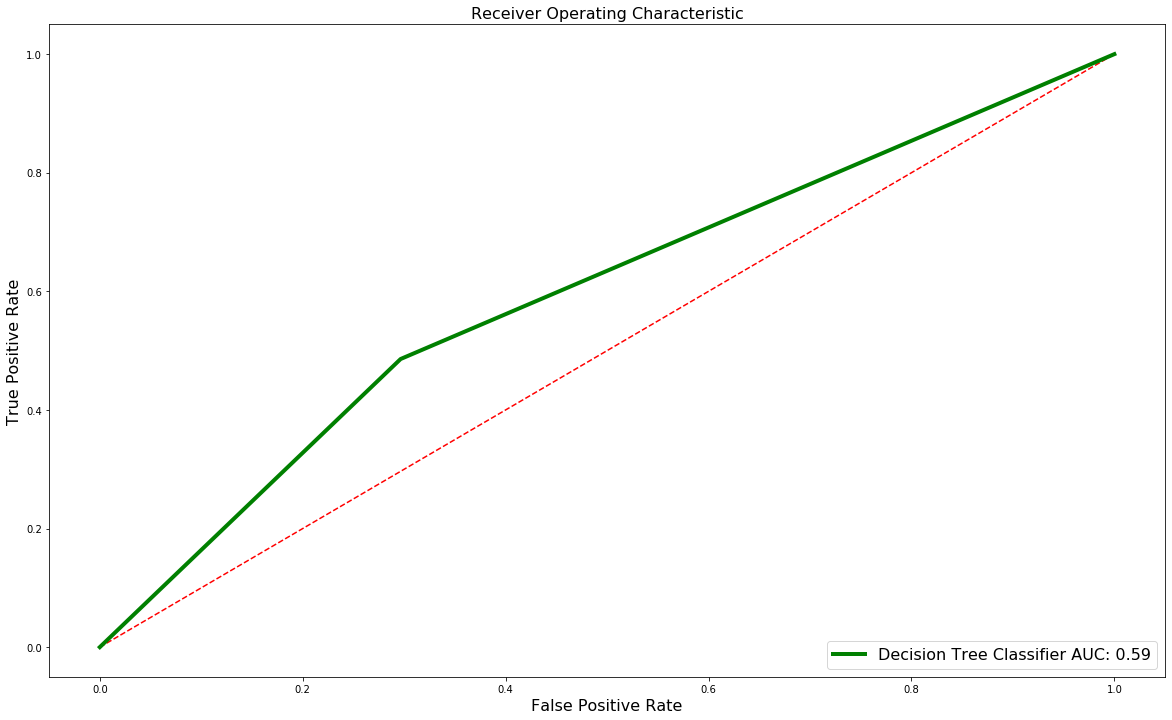

In [320]:
from sklearn.metrics import roc_curve, auc

plt.figure(figsize = (20, 12))
plt.plot([0,1], [0,1], 'r--')

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

label = 'Decision Tree Classifier AUC:' + ' {0:.2f}'.format(roc_auc)
plt.plot(fpr, tpr, c = 'g', label = label, linewidth = 4)
plt.xlabel('False Positive Rate', fontsize = 16)
plt.ylabel('True Positive Rate', fontsize = 16)
plt.title('Receiver Operating Characteristic', fontsize = 16)
plt.legend(loc = 'lower right', fontsize = 16)

## Classification problem cp3

In [321]:
# The target variable has 2 values - 
# Value '0' for 'No Readmit' or 'readmit > 30 days'
# Value '1' for 'Readmit <30 days'


# The original cleaned data was imbalanced, hence upsampling and downsampling is done
# Test Train split is done prior to balancing exercise
# Three datasets are available post balancing -  cp3_test.csv,  cp3_train_upsampled.csv, cp3_train_downsampled.csv


In [322]:
# Read the datasets

df_cp3_test = pd.read_csv('.\cp3\cp3_test.csv')
df_cp3_train_up = pd.read_csv('.\cp3\cp3_train_upsampled.csv')
df_cp3_train_dn = pd.read_csv('.\cp3\cp3_train_downsampled.csv')

In [323]:
# Check basic Shape of Dataframe

print("\n cp3_test Dataframe Rows = ", len(df_cp3_test.index))
print("\n cp3_test Dataframe Columns = ", len(df_cp3_test.columns))

print("\n cp3_train_upsampled Dataframe Rows = ", len(df_cp3_train_up.index))
print("\n cp3_train_upsampled Dataframe Columns = ", len(df_cp3_train_up.columns))

print("\n cp3_train_downsampled Dataframe Rows = ", len(df_cp3_train_dn.index))
print("\n cp3_train_downsampled Dataframe Columns = ", len(df_cp3_train_dn.columns))


 cp3_test Dataframe Rows =  9950

 cp3_test Dataframe Columns =  44

 cp3_train_upsampled Dataframe Rows =  119460

 cp3_train_upsampled Dataframe Columns =  44

 cp3_train_downsampled Dataframe Rows =  20146

 cp3_train_downsampled Dataframe Columns =  44


In [324]:
df_cp3_test.describe()

,Unnamed: 0,Unnamed: 0.1,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,gender_Female,gender_Male,age_[0-10),age_[10-20),age_[20-30),age_[30-40),age_[40-50),age_[50-60),age_[60-70),age_[70-80),age_[80-90),age_[90-100),race_AfricanAmerican,race_Asian,race_Caucasian,race_Hispanic,race_Other,max_glu_serum_>200,max_glu_serum_>300,max_glu_serum_None,max_glu_serum_Norm,A1Cresult_>7,A1Cresult_>8,A1Cresult_None,A1Cresult_Norm,change_Ch,change_No,diabetesMed_No,diabetesMed_Yes,insulin_Down,insulin_No,insulin_Steady,insulin_Up,readmit_in_30_days
count,9950.000000,9950.000000,9950.000000,9950.000000,9950.000000,9950.000000,9950.000000,9950.000000,9950.000000,9950.000000,9950.000000,9950.000000,9950.000000,9950.000000,9950.000000,9950.000000,9950.000000,9950.000000,9950.000000,9950.000000,9950.000000,9950.000000,9950.00000,9950.000000,9950.000000,9950.000000,9950.000000,9950.000000,9950.000000,9950.000000,9950.000000,9950.000000,9950.000000,9950.000000,9950.000000,9950.000000,9950.000000,9950.000000,9950.000000,9950.000000,9950.000000,9950.000000,9950.000000,9950.000000
mean,49456.959799,50571.078392,4.351256,43.204925,1.366030,16.068744,0.370151,0.208442,0.621709,7.427739,0.529548,0.470452,0.002010,0.006633,0.016482,0.033970,0.097286,0.169548,0.222010,0.252563,0.170452,0.029045,0.19005,0.006332,0.765528,0.022613,0.015477,0.015578,0.013166,0.946533,0.024724,0.038593,0.078995,0.833065,0.049347,0.467638,0.532362,0.226432,0.773568,0.124724,0.468141,0.300704,0.106432,0.110151
std,28758.813538,29378.202022,2.966753,19.695386,1.717011,8.142792,1.340424,1.291307,1.206247,1.928294,0.499151,0.499151,0.044791,0.081178,0.127328,0.181161,0.296362,0.375254,0.415619,0.434504,0.376049,0.167942,0.39236,0.079323,0.423690,0.148674,0.123448,0.123842,0.113990,0.224975,0.155289,0.192632,0.269744,0.372936,0.216602,0.498977,0.498977,0.418543,0.418543,0.330422,0.499009,0.458587,0.308405,0.313093
min,4.000000,4.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,24561.000000,24951.250000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,49232.000000,50492.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,74439.500000,75955.500000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000
max,99491.000000,101765.000000,14.000000,114.000000,6.000000,81.000000,40.000000,76.000000,17.000000,16.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0

In [325]:
df_cp3_train_up.describe()

,Unnamed: 0,Unnamed: 0.1,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,gender_Female,gender_Male,age_[0-10),age_[10-20),age_[20-30),age_[30-40),age_[40-50),age_[50-60),age_[60-70),age_[70-80),age_[80-90),age_[90-100),race_AfricanAmerican,race_Asian,race_Caucasian,race_Hispanic,race_Other,max_glu_serum_>200,max_glu_serum_>300,max_glu_serum_None,max_glu_serum_Norm,A1Cresult_>7,A1Cresult_>8,A1Cresult_None,A1Cresult_Norm,change_Ch,change_No,diabetesMed_No,diabetesMed_Yes,insulin_Down,insulin_No,insulin_Steady,insulin_Up,readmit_in_30_days
count,119460.000000,119460.000000,119460.000000,119460.000000,119460.000000,119460.000000,119460.000000,119460.000000,119460.000000,119460.000000,119460.000000,119460.000000,119460.000000,119460.000000,119460.000000,119460.000000,119460.000000,119460.000000,119460.000000,119460.000000,119460.000000,119460.000000,119460.000000,119460.000000,119460.000000,119460.000000,119460.000000,119460.000000,119460.000000,119460.000000,119460.000000,119460.000000,119460.000000,119460.000000,119460.000000,119460.000000,119460.000000,119460.000000,119460.000000,119460.000000,119460.000000,119460.000000,119460.000000,119460.000000
mean,49554.913720,50670.601724,4.492717,43.297798,1.321639,16.247857,0.389034,0.241646,0.797991,7.509811,0.541713,0.458287,0.001247,0.005985,0.017094,0.037887,0.092299,0.165428,0.222074,0.259585,0.171137,0.027264,0.193412,0.006395,0.766407,0.019663,0.014122,0.014967,0.013569,0.945421,0.026042,0.036246,0.078127,0.838356,0.047271,0.467813,0.532187,0.223472,0.776528,0.128662,0.454771,0.300402,0.116164,0.334765
std,28673.468919,29292.077221,3.008409,19.586193,1.684592,8.132117,1.268861,1.021879,1.511874,1.890921,0.498259,0.498259,0.035295,0.077133,0.129621,0.190924,0.289448,0.371568,0.415643,0.438409,0.376630,0.162853,0.394975,0.079716,0.423118,0.138842,0.117994,0.121423,0.115695,0.227157,0.159261,0.186904,0.268372,0.368126,0.212219,0.498965,0.498965,0.416574,0.416574,0.334827,0.497952,0.458435,0.320423,0.471910
min,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,24620.000000,25011.000000,2.000000,32.000000,0.000000,11.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,49286.500000,50546.500000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,74318.250000,75830.250000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000
max,99490.000000,101764.000000,14.000000,132.000000,6.000000,79.000000,42.000000,64.000000,19.000000,16.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0000

In [326]:
df_cp3_train_dn.describe()

,Unnamed: 0,Unnamed: 0.1,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,gender_Female,gender_Male,age_[0-10),age_[10-20),age_[20-30),age_[30-40),age_[40-50),age_[50-60),age_[60-70),age_[70-80),age_[80-90),age_[90-100),race_AfricanAmerican,race_Asian,race_Caucasian,race_Hispanic,race_Other,max_glu_serum_>200,max_glu_serum_>300,max_glu_serum_None,max_glu_serum_Norm,A1Cresult_>7,A1Cresult_>8,A1Cresult_None,A1Cresult_Norm,change_Ch,change_No,diabetesMed_No,diabetesMed_Yes,insulin_Down,insulin_No,insulin_Steady,insulin_Up,readmit_in_30_days
count,20146.000000,20146.000000,20146.000000,20146.000000,20146.000000,20146.000000,20146.000000,20146.000000,20146.000000,20146.000000,20146.000000,20146.000000,20146.000000,20146.000000,20146.000000,20146.000000,20146.000000,20146.000000,20146.000000,20146.000000,20146.000000,20146.000000,20146.000000,20146.000000,20146.000000,20146.000000,20146.000000,20146.000000,20146.000000,20146.000000,20146.000000,20146.000000,20146.000000,20146.000000,20146.000000,20146.000000,20146.000000,20146.000000,20146.000000,20146.000000,20146.000000,20146.000000,20146.000000,20146.000000
mean,49440.038866,50552.866971,4.573662,43.617889,1.310483,16.451951,0.403356,0.271816,0.903256,7.563238,0.543979,0.456021,0.001142,0.005559,0.016778,0.037973,0.095602,0.162811,0.221731,0.260498,0.171101,0.026804,0.197856,0.006354,0.764072,0.018068,0.013650,0.015090,0.014494,0.944058,0.026358,0.035789,0.077087,0.838876,0.048248,0.471111,0.528889,0.218753,0.781247,0.132880,0.447235,0.299811,0.120073,0.500000
std,28635.276768,29253.984891,3.018806,19.497763,1.671464,8.158902,1.297770,1.114082,1.644963,1.860351,0.498074,0.498074,0.033770,0.074356,0.128440,0.191135,0.294052,0.369203,0.415422,0.438917,0.376607,0.161515,0.398393,0.079458,0.424588,0.133201,0.116037,0.121913,0.119519,0.229815,0.160200,0.185768,0.266736,0.367654,0.214295,0.499177,0.499177,0.413411,0.413411,0.339453,0.497220,0.458187,0.325055,0.500012
min,11.000000,11.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,24434.500000,24823.500000,2.000000,32.000000,0.000000,11.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,49325.000000,50585.000000,4.000000,45.000000,1.000000,15.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.500000
75%,73964.250000,75459.000000,6.000000,57.000000,2.000000,21.000000,0.000000,0.000000,1.000000,9.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000
max,99488.000000,101762.000000,14.000000,132.000000,6.000000,75.000000,42.000000,64.000000,21.000000,16.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0

In [327]:
df_cp3_test.sample(5)

,Unnamed: 0,Unnamed: 0.1,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,gender_Female,gender_Male,age_[0-10),age_[10-20),age_[20-30),age_[30-40),age_[40-50),age_[50-60),age_[60-70),age_[70-80),age_[80-90),age_[90-100),race_AfricanAmerican,race_Asian,race_Caucasian,race_Hispanic,race_Other,max_glu_serum_>200,max_glu_serum_>300,max_glu_serum_None,max_glu_serum_Norm,A1Cresult_>7,A1Cresult_>8,A1Cresult_None,A1Cresult_Norm,change_Ch,change_No,diabetesMed_No,diabetesMed_Yes,insulin_Down,insulin_No,insulin_Steady,insulin_Up,readmit_in_30_days
3469,25748,26158,1,49,4,12,0,0,0,7,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,1,0,0,0
9421,6079,6202,6,25,2,14,0,0,0,8,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,1,1,0,0,0,0
6277,93723,95818,5,34,0,16,0,0,0,9,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,1,0,0,0
9087,19069,19384,6,21,2,15,0,0,0,7,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,1,0,0,1,0,0,0
5987,1540,1582,4,41,4,16,8,0,0,8,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0,1


In [328]:
df_cp3_train_up.sample(5)

,Unnamed: 0,Unnamed: 0.1,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,gender_Female,gender_Male,age_[0-10),age_[10-20),age_[20-30),age_[30-40),age_[40-50),age_[50-60),age_[60-70),age_[70-80),age_[80-90),age_[90-100),race_AfricanAmerican,race_Asian,race_Caucasian,race_Hispanic,race_Other,max_glu_serum_>200,max_glu_serum_>300,max_glu_serum_None,max_glu_serum_Norm,A1Cresult_>7,A1Cresult_>8,A1Cresult_None,A1Cresult_Norm,change_Ch,change_No,diabetesMed_No,diabetesMed_Yes,insulin_Down,insulin_No,insulin_Steady,insulin_Up,readmit_in_30_days
110086,23970,24350,2,20,0,12,0,1,1,5,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,1,0,0,1
5537,98969,101220,3,67,0,24,4,0,1,9,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0
24082,92543,94602,3,1,0,10,0,0,0,9,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0
32614,9674,9854,2,41,0,14,0,0,0,9,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0
107401,33486,34528,8,68,4,21,0,0,0,5,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,1


In [329]:
df_cp3_train_dn.sample(5)

,Unnamed: 0,Unnamed: 0.1,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,gender_Female,gender_Male,age_[0-10),age_[10-20),age_[20-30),age_[30-40),age_[40-50),age_[50-60),age_[60-70),age_[70-80),age_[80-90),age_[90-100),race_AfricanAmerican,race_Asian,race_Caucasian,race_Hispanic,race_Other,max_glu_serum_>200,max_glu_serum_>300,max_glu_serum_None,max_glu_serum_Norm,A1Cresult_>7,A1Cresult_>8,A1Cresult_None,A1Cresult_Norm,change_Ch,change_No,diabetesMed_No,diabetesMed_Yes,insulin_Down,insulin_No,insulin_Steady,insulin_Up,readmit_in_30_days
875,96378,98551,7,79,0,29,4,0,0,9,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,1,0,0,1,0,0,0
2880,11948,12163,6,75,2,23,0,0,1,6,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,1,0,0,1,0,0,0
17264,10754,10948,11,72,5,30,1,1,2,9,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,1,0,0,1,0,0,1
6087,13364,13605,5,33,1,11,0,0,0,5,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,1,0,0,1,0,0,0
3941,64582,65917,1,29,6,15,4,0,0,9,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,1,0,0,0


In [330]:
# We drop first 2 columns from all 3 datasets since they have some unknown data, probably due to balancing exercise

df_cp3_test=df_cp3_test.drop(columns=list(df_cp3_test)[0:2])
df_cp3_train_up=df_cp3_train_up.drop(columns=list(df_cp3_train_up)[0:2])
df_cp3_train_dn=df_cp3_train_dn.drop(columns=list(df_cp3_train_dn)[0:2])
y_test=df_cp3_test.pop('readmit_in_30_days')
y_train_up=df_cp3_train_up.pop('readmit_in_30_days')
y_train_dn=df_cp3_train_dn.pop('readmit_in_30_days')

### Max depth tuning

In [331]:
# For upscaled training dataset

for i in range(1, 50):
    print('Accuracy score using max_depth =', i, end = ':  ')
    fit_predict(df_cp3_train_up, df_cp3_test, y_train_up, y_test, StandardScaler(), i)

Accuracy score using max_depth = 1:  0.889849
Accuracy score using max_depth = 2:  0.889849
Accuracy score using max_depth = 3:  0.889849
Accuracy score using max_depth = 4:  0.889849
Accuracy score using max_depth = 5:  0.887739
Accuracy score using max_depth = 6:  0.886633
Accuracy score using max_depth = 7:  0.889749
Accuracy score using max_depth = 8:  0.874874
Accuracy score using max_depth = 9:  0.881206
Accuracy score using max_depth = 10:  0.857487
Accuracy score using max_depth = 11:  0.872965
Accuracy score using max_depth = 12:  0.876784
Accuracy score using max_depth = 13:  0.873467
Accuracy score using max_depth = 14:  0.864623
Accuracy score using max_depth = 15:  0.849447
Accuracy score using max_depth = 16:  0.855678
Accuracy score using max_depth = 17:  0.847236
Accuracy score using max_depth = 18:  0.838794
Accuracy score using max_depth = 19:  0.834673
Accuracy score using max_depth = 20:  0.827437
Accuracy score using max_depth = 21:  0.821106
Accuracy score using m

In [335]:
# For downscaled training dataset

for i in range(1, 50):
    print('Accuracy score using max_depth =', i, end = ':  ')
    fit_predict(df_cp3_train_dn, df_cp3_test, y_train_dn, y_test, StandardScaler(), i)

Accuracy score using max_depth = 1:  0.184523
Accuracy score using max_depth = 2:  0.153065
Accuracy score using max_depth = 3:  0.527638
Accuracy score using max_depth = 4:  0.595075
Accuracy score using max_depth = 5:  0.534271
Accuracy score using max_depth = 6:  0.526432
Accuracy score using max_depth = 7:  0.340201
Accuracy score using max_depth = 8:  0.507940
Accuracy score using max_depth = 9:  0.570251
Accuracy score using max_depth = 10:  0.497186
Accuracy score using max_depth = 11:  0.626734
Accuracy score using max_depth = 12:  0.582412
Accuracy score using max_depth = 13:  0.494673
Accuracy score using max_depth = 14:  0.494975
Accuracy score using max_depth = 15:  0.565528
Accuracy score using max_depth = 16:  0.584020
Accuracy score using max_depth = 17:  0.509749
Accuracy score using max_depth = 18:  0.518593
Accuracy score using max_depth = 19:  0.544221
Accuracy score using max_depth = 20:  0.542010
Accuracy score using max_depth = 21:  0.570854
Accuracy score using m

In [ ]:
# Looking at results we can see the best score is achieved for 'Upscaled' dataset at 'depth' 1,2,3,4 = 0.889849
# and further increase of depth deteriorates the result.  
# This is not normal, as depth <4 for 40+ features is not a right fit. likely the upscaled database in this classficiation
# problem is not a good scenario to work with

# Regardless we investigate further with upscaled training dataset and use max_depth = 4

# for downscaled dataset we can see the best score is achieved at 'depth' 11 = 0.626734


# We pick depth = 4 for upscaled 
# We pick depth = 11 for downscaled 

### Max Features tuning

In [333]:
# For upscaled training dataset

for i in np.arange(0.1, 1.0, 0.1):
    print('Accuracy score using max features =', i, end = ': ')
    fit_predict(df_cp3_train_up, df_cp3_test, y_train_up, y_test, StandardScaler(), max_depth = 4, max_features=i)

Accuracy score using max features = 0.1: 0.872060
Accuracy score using max features = 0.2: 0.875678
Accuracy score using max features = 0.30000000000000004: 0.855578
Accuracy score using max features = 0.4: 0.855678
Accuracy score using max features = 0.5: 0.855578
Accuracy score using max features = 0.6: 0.879799
Accuracy score using max features = 0.7000000000000001: 0.848141
Accuracy score using max features = 0.8: 0.852764
Accuracy score using max features = 0.9: 0.851658


In [336]:
# For downscaled training dataset

for i in np.arange(0.1, 1.0, 0.1):
    print('Accuracy score using max features =', i, end = ': ')
    fit_predict(df_cp3_train_dn, df_cp3_test, y_train_dn, y_test, StandardScaler(), max_depth = 11, max_features=i)

Accuracy score using max features = 0.1: 0.618392
Accuracy score using max features = 0.2: 0.611859
Accuracy score using max features = 0.30000000000000004: 0.567236
Accuracy score using max features = 0.4: 0.581508
Accuracy score using max features = 0.5: 0.529648
Accuracy score using max features = 0.6: 0.613568
Accuracy score using max features = 0.7000000000000001: 0.597789
Accuracy score using max features = 0.8: 0.631558
Accuracy score using max features = 0.9: 0.560201


In [ ]:
# for 'Upscaled' dataset tuning of 'max_features' deteriorates the result, hence we use default value and do not specify
# for 'Downscaled' dataset, best score is achieved  at 'max_features' value 0.8 = 0.631558, which is improvement from None


### Min samples split tuning

In [352]:
# For upscaled dataset

for i in range(2, 10):
    print('Accuracy score using min samples split =', i, end=': ')
    fit_predict(df_cp3_train_up,
                df_cp3_test,
                y_train_up,
                y_test,
                StandardScaler(),
                max_depth=4,
                min_samples_split=i)

Accuracy score using min samples split = 2: 0.889849
Accuracy score using min samples split = 3: 0.889849
Accuracy score using min samples split = 4: 0.889849
Accuracy score using min samples split = 5: 0.889849
Accuracy score using min samples split = 6: 0.889849
Accuracy score using min samples split = 7: 0.889849
Accuracy score using min samples split = 8: 0.889849
Accuracy score using min samples split = 9: 0.889849


In [341]:
# For downscaled dataset

for i in range(2, 10):
    print('Accuracy score using min samples split =', i, end=': ')
    fit_predict(df_cp3_train_dn,
                df_cp3_test,
                y_train_dn,
                y_test,
                StandardScaler(),
                max_depth=11,
                max_features=0.8,
                min_samples_split=i)

Accuracy score using min samples split = 2: 0.587940
Accuracy score using min samples split = 3: 0.576583
Accuracy score using min samples split = 4: 0.631558
Accuracy score using min samples split = 5: 0.625327
Accuracy score using min samples split = 6: 0.605327
Accuracy score using min samples split = 7: 0.570452
Accuracy score using min samples split = 8: 0.584422
Accuracy score using min samples split = 9: 0.576080


In [343]:
# for 'Upscaled' dataset tuning of 'min samples split' has no impact, hence we use default value and do not specify 
# for 'Downscaled' dataset, best score is achieved  at 'max_features' value 0.4 = 0.631558, 
# which is no improvement from None, hence we use value 0.4

### Criterion tuning

In [353]:
# For upscaled dataset

for i in ['gini', 'entropy']:
    print('Accuracy score using criterion =', i, end = ': ')
    fit_predict(df_cp3_train_up,
                df_cp3_test,
                y_train_up,
                y_test,
                StandardScaler(),
                max_depth=4,
                criterion=i)

Accuracy score using criterion = gini: 0.889849
Accuracy score using criterion = entropy: 0.889849


In [354]:
# For downscaled dataset

for i in ['gini', 'entropy']:
    print('Accuracy score using criterion =', i, end = ': ')
    fit_predict(df_cp3_train_dn,
                df_cp3_test,
                y_train_dn,
                y_test,
                StandardScaler(),
                max_depth=11,
                max_features=0.8,
                min_samples_split=4,
               criterion=i)

Accuracy score using criterion = gini: 0.555879
Accuracy score using criterion = entropy: 0.631558


In [ ]:
# for upscaled dataset, criterion has no impact
# for downscaled dtaset Criterion 'entropy' is better, so we retain it, no improvement with 'gini'

#  We have seen that upscaled dataset has actually no impact of any hyperparameter tuning, also as we noted in max_depth
# section, max_depth <4 does not look reasonable. hence we do not use upscaled database for model tuning, and proceed 
# only with downscaled dataset

### Final Decision Tree parameters for cp3

In [355]:
# For downscaled dataset

dt = DecisionTreeClassifier(criterion='entropy',max_depth=11,max_features=0.8,min_samples_split=4,random_state=42)
dt.fit(df_cp3_train_dn, y_train_dn)
print("Accuracy on training set: {:.6f}".format(dt.score(df_cp3_train_dn, y_train_dn)))
print("Accuracy on test set: {:.6f}".format(dt.score(df_cp3_test, y_test)))

Accuracy on training set: 0.644446
Accuracy on test set: 0.631658


In [356]:
y_pred = dt.predict(df_cp3_test)

### Confusion Matrix

In [357]:
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred)) 

[[5735 3119]
 [ 546  550]]
              precision    recall  f1-score   support

           0       0.91      0.65      0.76      8854
           1       0.15      0.50      0.23      1096

    accuracy                           0.63      9950
   macro avg       0.53      0.57      0.49      9950
weighted avg       0.83      0.63      0.70      9950



### ROC Curve

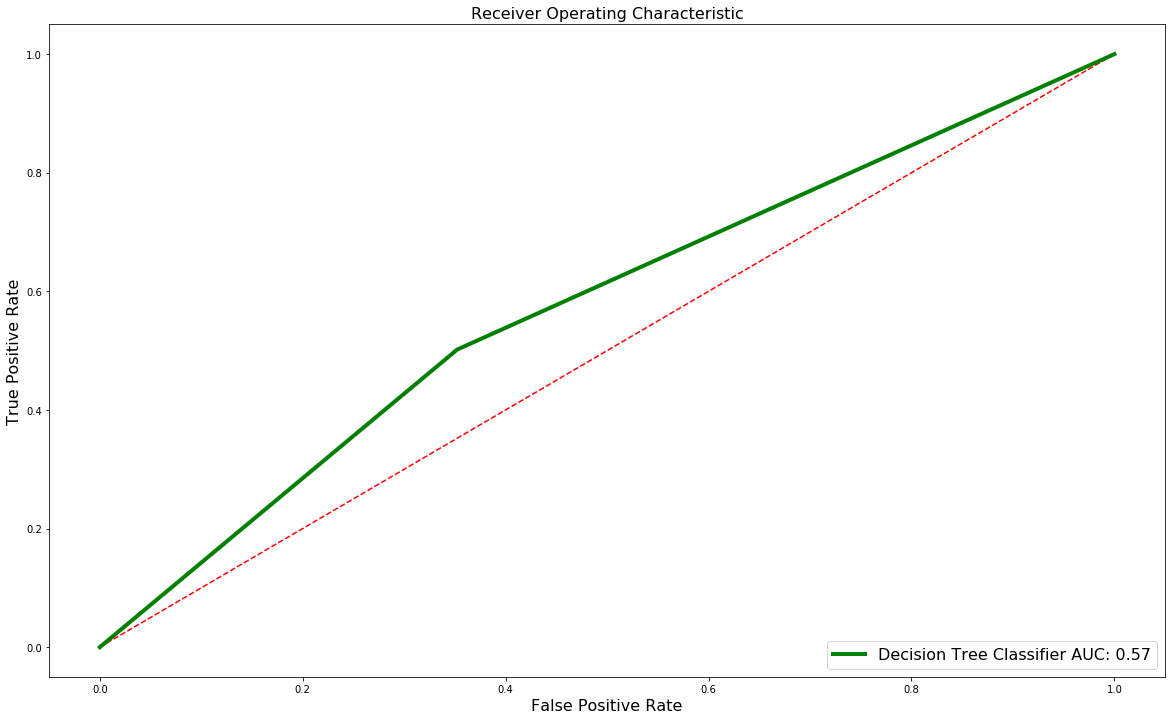

In [358]:
plt.figure(figsize = (20, 12))
plt.plot([0,1], [0,1], 'r--')

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

label = 'Decision Tree Classifier AUC:' + ' {0:.2f}'.format(roc_auc)
plt.plot(fpr, tpr, c = 'g', label = label, linewidth = 4)
plt.xlabel('False Positive Rate', fontsize = 16)
plt.ylabel('True Positive Rate', fontsize = 16)
plt.title('Receiver Operating Characteristic', fontsize = 16)
plt.legend(loc = 'lower right', fontsize = 16)